## Assignment 3 Part 1 - Statistical Inference

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
# Initialize Otter
import otter
grader = otter.Notebook()

## **Assignment Instructions**

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Store your answers in the variables already defined at the end of each question. (These variables are followed by "...")

# **Submission Instructions**

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_1.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

### **Indian Liver Patient Records**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

This data set contains 416 liver patient records and 167 non liver patient records collected from India. The "Outcome" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Run the cell below to load the dataset and explore its attributes for a study conducted for 583 patients.

### **Loading Data**

In [3]:
df = pd.read_csv('indian_liver_patient_dataset.csv')
df = df.dropna()
df = df.reset_index()
df

,index,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Columns:
<br>
Age of the patient <br>
Gender of the patient<br>
Total Bilirubin : Liver function marker<br>
Direct Bilirubin: Liver function marker<br>
Alkaline Phosphotase: Liver function marker<br>
Alamine Aminotransferase: Liver function marker<br>
Aspartate Aminotransferase: Liver function marker<br>
Total Protiens : Total Protein level<br>
Albumin<br>
Albumin and Globulin Ratio<br>
Outcome: field used to split the data into two sets (patient with liver disease =1, or no disease =2)<br>

This data has been cleaned to remove any nulll values so that there are none. Therefore, the data's rows may be lesser than the original study that was conducted.

**Question 1**: Print the dataset's description in the following cell and check whether any null values exist. (3)

In [4]:
#Solution
print(df.describe())
if(df.isnull().sum().sum() != 0):
    print('NULL values are present')
else:
    print('NULL values are not present')


            index         Age  Total_Bilirubin  Direct_Bilirubin  \
count  579.000000  579.000000       579.000000        579.000000   
mean   291.257340   44.782383         3.315371          1.494128   
std    168.966657   16.221786         6.227716          2.816499   
min      0.000000    4.000000         0.400000          0.100000   
25%    144.500000   33.000000         0.800000          0.200000   
50%    292.000000   45.000000         1.000000          0.300000   
75%    437.500000   58.000000         2.600000          1.300000   
max    582.000000   90.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            579.000000                579.000000   
mean             291.366149                 81.126079   
std              243.561863                183.182845   
min               63.000000                 10.000000   
25%              175.500000                 23.000000   
50%              208.000000                 3

### Liver Disease and the population

In this section, we will be exploring whether this dataset is a representative sample of population by examining the patients under this survey. This will help us highlights the limitations of the dataset.

According to the NCBI
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5658106/), the prevalence of diagnosed liver disease (i.e., the proportion of the population who have it) in India around this time was 0.013. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within this study has liver disease is equivalent to the prevalence of diagnosed liver disease within the population. (i.e., any difference between the study prevalence and population prevalence is due to random chance in the selection of the participants).

**Alternative Hypothesis**: The probability that a participant within the study has liver disease is different than the prevalence of diagnosed liver disease within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. 

**Question 2**: What is the observed value of the statistic in the data from the Indian Liver Patient Dataset? (5)

In [5]:
#Solution
ser = df.loc[:, ['Outcome']].value_counts()
# total = ser[1] + ser[2]
total = 583
prevalence_ld = 0.013
rat = abs(ser[1]/total)

observed_liverdisease_distance = rat-prevalence_ld

In [6]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3**: Make a function that returns a simulated statistic under the null hypothesis. Use the function to return exactly one simulated statistic under the null hypothesis. Remember that our statistic is the absolute distance between the observed prevalence and the true population prevalence.(7)

**Hint:** Look into the [np.random.multinomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) function for simulating the statistic.

In [7]:

liverdisease_proportion = [0.987,0.013]

def liverdisease_statistic():
    simulated_stat = np.random.multinomial(total, liverdisease_proportion)
    return simulated_stat[1]

x = liverdisease_statistic()
x = abs((x/total) - prevalence_ld)
# x

In [8]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**: Use this function to simulate 10000 values of the statistic under null hypothesis. Append these simulated values in the "liverdisease_simulated_stats" list. (7)

In [9]:
liverdisease_simulated_stats = []

for i in range(10000): 
    simulated_stat = liverdisease_statistic()
    liverdisease_simulated_stats = np.append(liverdisease_simulated_stats, simulated_stat)

liverdisease_simulated_stats = abs((liverdisease_simulated_stats/total) - prevalence_ld)

len(liverdisease_simulated_stats)

10000

In [10]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5**: Generate a histogram of the simulated values of your statistic, along with the observed value. Label Histogram axes correctly.(4)

*Explain what this histogram displays.*

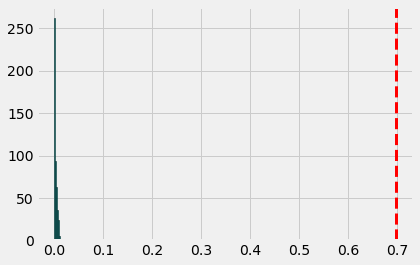

In [11]:
#Solution
result = plt.hist(liverdisease_simulated_stats, density=True, color='c', edgecolor='k')
plt.axvline(observed_liverdisease_distance, color='red', linestyle='dashed', linewidth=3)

# plt.hist(liverdisease_simulated_stats)
plt.show()

**Question 6**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis? (2)

The data does not favour the null hypothesis. We should reject the null hypothesis because the observed value is not falling in our histogram.

**Few Descriptive Questions regarding Sampling/Re-sampling** Please re-visit the concepts of bootstrap sampling and other sampling techniques before doing the next question.

**Question 7 (a):** Why does the resampling distribution of the difference in means approach a normal distribution? (1)

If the difference in means gets large enough, the resampling distribution is summed over the sample which then approximates to normal distribution.

**Question 7 (b):** Write 3 advantages and 3 disadvantages of using the bootstrap sampling method? List them down. (3)

Advantages:
1. Checking parametric assumptions and it is used they are not made or are very complicated.
2. Avoids the cost of taking new samples(estimate a sampling when only one sample is available).
3. Estimation of variance in quantiles.

Disadvantages:
1. Relies on a representative sample.
2. Problem occurs while estimating very high or very low percentiles, or min and max.
3. Not useful when we are trying to estimate any parameter which is greatly affected by rare elements.

**Question 8:** Sample 100 instances from the dataset with replacement and print their description. (2)

In [12]:
#solution
sam = df.sample(n=100, replace=True)
desc = sam.describe()
desc

,index,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,265.320000,45.92000,4.354000,2.108000,332.610000,93.210000,105.180000,6.318000,2.979000,0.881300,1.310000
std,172.138004,16.94297,6.604642,3.446406,340.721217,212.850367,159.326764,1.123071,0.795352,0.263702,0.464823
min,8.000000,7.00000,0.400000,0.100000,100.000000,10.000000,10.000000,3.900000,1.500000,0.350000,1.000000
25%,119.750000,34.75000,0.700000,0.200000,187.250000,24.750000,29.000000,5.500000,2.400000,0.700000,1.000000
50%,238.000000,45.50000,1.400000,0.550000,218.500000,37.000000,52.500000,6.500000,2.900000,0.900000,1.000000
75%,422.750000,60.00000,3.700000,2.350000,298.500000,61.250000,113.250000,7.000000,3.625000,1.000000,2.000000
max,568.000000,75.00000,30.500000,17.100000,1896.000000,1630.000000,1050.000000,8.600000,5.000000,1.850000,2.000000


**Question 9:** Make a function that generates the mean "Total Protein"  level of the 100 patients you sampled above. Generate the mean for 1000 samples and append all values to an array/list (5)

In [13]:
#Calculate mean of sampled data from last question
def mean_proteins(sam):
    meen = sam.loc['mean','Total_Protiens']
    return meen

org_mean = mean_proteins(desc)
# print(org_mean)

In [14]:
#Create function (Generate the mean for 1000 samples and append all values to an array/list)
def samples(df):
    mean_list = []
    for i in range(1000):
        samp = df.sample(n=100, replace=True)
        mn = samp.describe().loc['mean','Total_Protiens']
        mean_list.append(mn)
    return mean_list

lis = []
lis = (samples(df))
# lis

**Question 10:** Call the function above and generate a histogram of the simulated values of your statistic. Also show the original mean as a line drawn on your graph. (5)

*Explain what this histogram displays or any observations you make.*

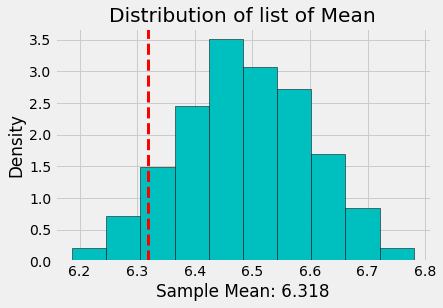

In [15]:
#solution

plt.xlabel("Sample Mean: {}".format(round(org_mean,3)))
plt.ylabel("Density")
plt.title("Distribution of list of Mean")
result = plt.hist(lis, density=True, color='c', edgecolor='k')
plt.axvline(org_mean, color='red', linestyle='dashed', linewidth=3)
plt.show()
# The list of mean is in a range from 6.1 to 6.8. From the histogram we can see that the original mean is 
# at the red line, it is in the bounds of our histogram which means that our data favours the null hypothesis. To the 
# right of the original mean is the area of the P-value.

**Question 11:** Print the bootstrap approximated 95% confidence interval for the mean "Total Protein" level of the dataset. (5)

In [16]:
#confidence_interval = [left,right]

confidence_interval = [0, 0]
confidence_interval[0] = np.percentile(lis, 2.5)
confidence_interval[1] = np.percentile(lis, 97.5)


# confidence_interval = ...
print("bootstrap approximated 95% confidence interval is :",confidence_interval)

bootstrap approximated 95% confidence interval is : [6.267900000000004, 6.692999999999999]


In [17]:
grader.check("q11")

q11 and q9 results: All test cases passed!